In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

import librosa as lb 

import os

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

In [2]:
# diagnosis file converted from txt to csv 
diagnosis = pd.read_csv(r"C:\Users\Sadashiv\OneDrive\Desktop\final project\archive (1)\Respiratory_Sound_Database\Respiratory_Sound_Database\patient_diagnosis.csv",names=['pId', 'diagnosis'])
diagnosis

,pId,diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI
...,...,...
121,222,COPD
122,223,COPD
123,224,Healthy
124,225,Healthy


In [3]:
ds = diagnosis['diagnosis'].unique()
ds

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [4]:
diagnosis['diagnosis'].value_counts()

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: diagnosis, dtype: int64

In [5]:
print(diagnosis.diagnosis.value_counts(normalize=True) *100)

COPD              50.793651
Healthy           20.634921
URTI              11.111111
Bronchiectasis     5.555556
Pneumonia          4.761905
Bronchiolitis      4.761905
LRTI               1.587302
Asthma             0.793651
Name: diagnosis, dtype: float64


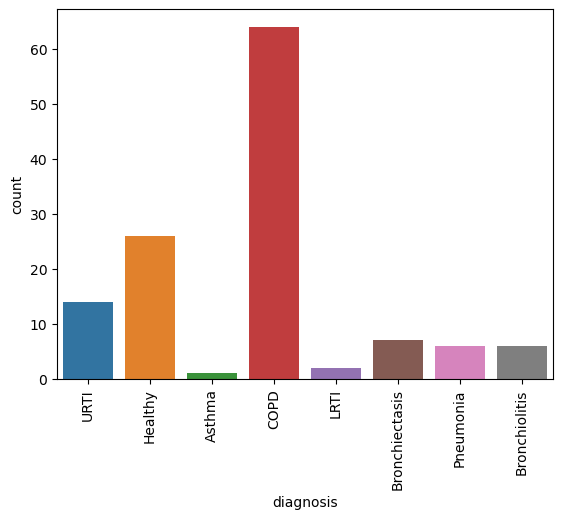

In [6]:
sns.countplot(data=diagnosis, x='diagnosis')
plt.xticks(rotation=90)
plt.show()

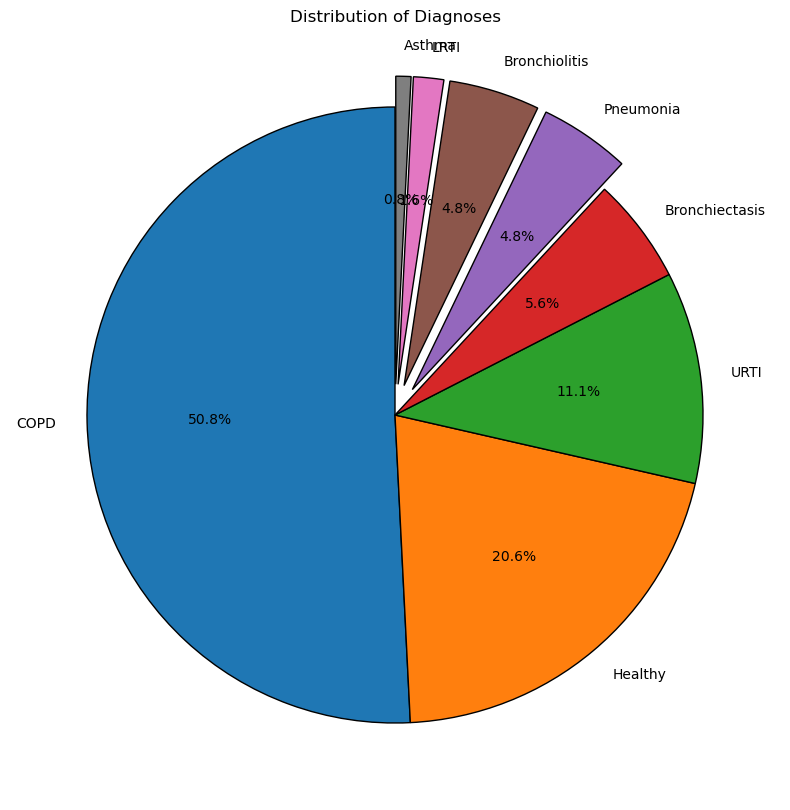

In [7]:
import matplotlib.pyplot as plt

# Step 1: Count the occurrences of each diagnosis category
diagnosis_counts = diagnosis['diagnosis'].value_counts()

# Step 2: Create a list to explode slices (optional, here no slice is exploded)
explode = [0.1 if count < 0.05 * sum(diagnosis_counts) else 0 for count in diagnosis_counts]

# Step 3: Create the pie chart with adjustments
plt.figure(figsize=(10, 10))  # Increase the figure size

plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%',
        startangle=90, explode=explode, wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Diagnoses')
plt.show()



In [8]:
path=r"C:\Users\Sadashiv\OneDrive\Desktop\final project\archive (1)\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files"
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]

In [9]:
def add_noise(data, x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data, x):
    return np.roll(data, x)

def stretch(data, rate):
    data_stretched = librosa.effects.time_stretch(data, rate=rate)
    return data_stretched

def pitch_shift(data, rate):
    data_pitch_shifted = librosa.effects.pitch_shift(data, sr=22050, n_steps=rate)
    return data_pitch_shifted

In [10]:
import librosa

def show_audio(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y, 0.0007)
    y_shift = shift(y, 3000)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)
    
    plt.figure(figsize=(20, 8))
    
    plt.subplot(3, 2, 1)
    librosa.display.waveshow(y, sr=sr)  
    plt.title('original')

    plt.subplot(3, 2, 2)
    librosa.display.waveshow(y_noise, sr=sr)
    plt.title('noise')
    
    plt.subplot(3, 2, 3)
    librosa.display.waveshow(y_shift, sr=sr)
    plt.title('shift')
    
    plt.subplot(3, 2, 4)
    librosa.display.waveshow(y_stretch_1, sr=sr)
    plt.title('stretch 1')
    
    plt.subplot(3, 2, 5)
    librosa.display.waveshow(y_stretch_2, sr=sr)
    plt.title('stretch 2')
    
    plt.subplot(3, 2, 6)
    librosa.display.waveshow(y_pitch_shift, sr=sr)
    plt.title('pitch shift')

    plt.tight_layout()

In [11]:
def show_audio_features(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y , 0.0007)
    y_shift = shift(y,3000)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)
    
    y = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=52)
    y_noise = librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=52)
    y_shift = librosa.feature.mfcc(y=y_shift, sr=sr, n_mfcc=52)
    y_stretch_1 = librosa.feature.mfcc(y=y_stretch_1, sr=sr, n_mfcc=52)
    y_stretch_2 = librosa.feature.mfcc(y=y_stretch_2, sr=sr, n_mfcc=52)
    y_pitch_shift = librosa.feature.mfcc(y=y_pitch_shift, sr=sr, n_mfcc=52)
    
    plt.figure(figsize=(20, 8))
    
    plt.subplot(3,2,1)
    librosa.display.specshow(librosa.power_to_db(y,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('orginal')

    plt.subplot(3,2,2)
    librosa.display.specshow(librosa.power_to_db(y_noise,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('noise')

    plt.subplot(3,2,3)
    librosa.display.specshow(librosa.power_to_db(y_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('shift')
    
    plt.subplot(3,2,4)
    librosa.display.specshow(librosa.power_to_db(y_stretch_1,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('stretch 1')
    
    plt.subplot(3,2,5)
    librosa.display.specshow(librosa.power_to_db(y_stretch_2,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('stretch 2')
    
    plt.subplot(3,2,6)
    librosa.display.specshow(librosa.power_to_db(y_pitch_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('pitch shift')
    
    

    plt.tight_layout()

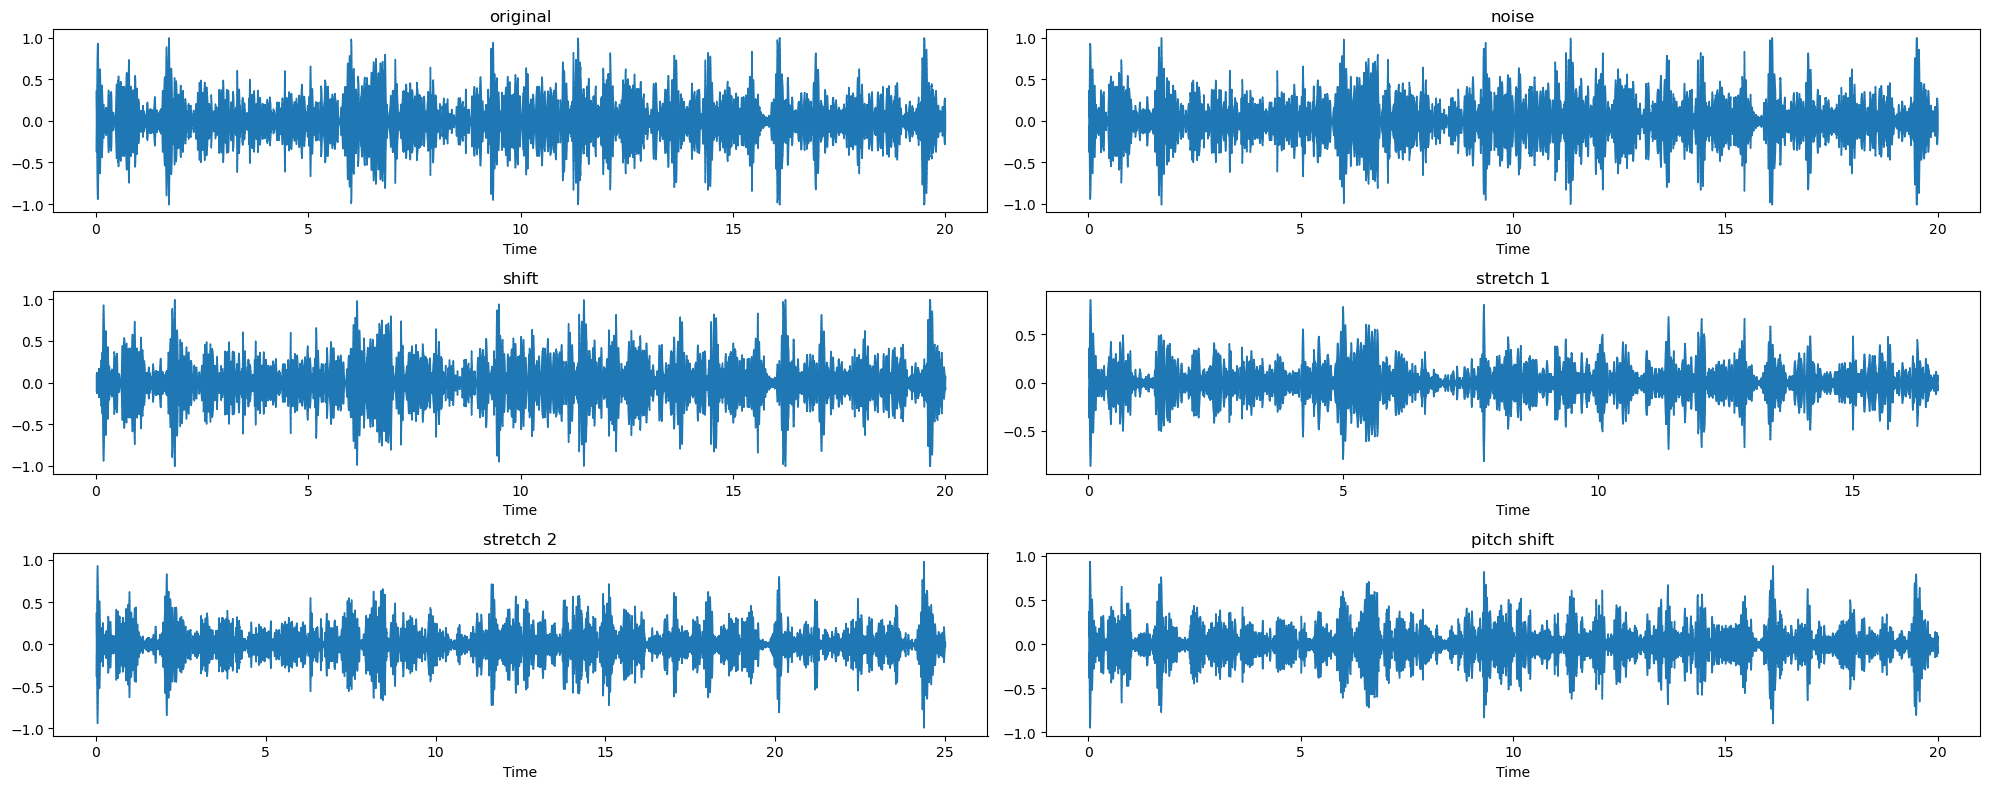

In [12]:
show_audio(r"C:\Users\Sadashiv\OneDrive\Desktop\final project\archive (1)\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files\103_2b2_Ar_mc_LittC2SE.wav")

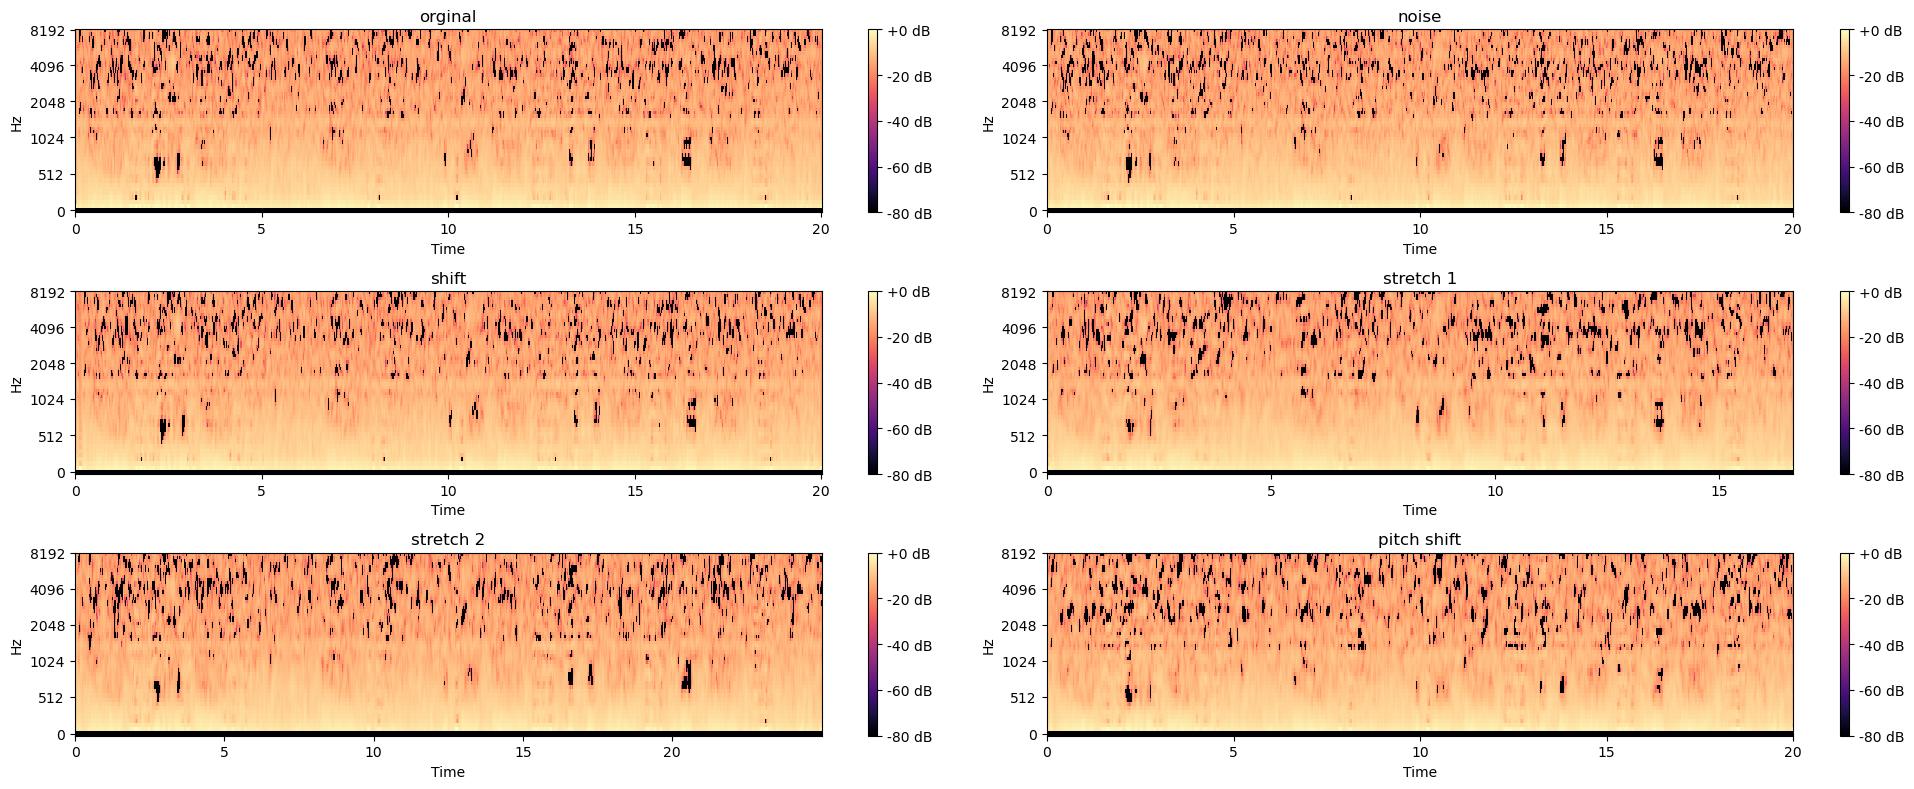

In [13]:
show_audio_features(r"C:\Users\Sadashiv\OneDrive\Desktop\final project\archive (1)\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files\103_2b2_Ar_mc_LittC2SE.wav")

In [14]:
def mfccs_feature_extraction(dir_):
    
    X_ = []
    y_ = []
    
    COPD = []
    copd_count = 0
    
    data = diagnosis
    features = 52
    
    for soundDir in os.listdir(dir_):
        if soundDir[-3:] == 'wav' and soundDir[:3] not in ['103', '108', '115']:
            p = list(data[data['pId'] == int(soundDir[:3])]['diagnosis'])[0]
            if p == 'COPD':
                if (soundDir[:6] in COPD) and copd_count < 2:
                    data_x, sampling_rate = librosa.load(dir_ + soundDir, res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    COPD.append(soundDir[:6])
                    copd_count += 1
                    X_.append(mfccs)
                    y_.append(list(data[data['pId'] == int(soundDir[:3])]['diagnosis'])[0])
                    
                if soundDir[:6] not in COPD:
                    data_x, sampling_rate = librosa.load(dir_ + soundDir, res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    COPD.append(soundDir[:6])
                    copd_count = 0
                    X_.append(mfccs)
                    y_.append(list(data[data['pId'] == int(soundDir[:3])]['diagnosis'])[0])
                
            if p != 'COPD':
                if (p == 'Bronchiectasis') or (p == 'Bronchiolitis'):
                    data_x, sampling_rate = librosa.load(dir_ + soundDir, res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs)
                    y_.append('Bronchiolitis')
                    
                    data_noise = add_noise(data_x, 0.001)
                    mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_noise)
                    y_.append('Bronchiolitis')

                    data_shift = shift(data_x, 1600)
                    mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_shift)
                    y_.append('Bronchiolitis')
                    
                    data_stretch = stretch(data_x, 1.2)
                    mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_stretch)
                    y_.append('Bronchiolitis')
                    
                    data_stretch_2 = stretch(data_x, 0.8)
                    mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_stretch_2)
                    y_.append('Bronchiolitis')
                    
                    data_pitch_shift = pitch_shift(data_x, 3)
                    mfccs_pitch_shift = np.mean(librosa.feature.mfcc(y=data_pitch_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_pitch_shift)
                    y_.append('Bronchiolitis')
                else: 
                    data_x, sampling_rate = librosa.load(dir_ + soundDir, res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs)
                    y_.append(list(data[data['pId'] == int(soundDir[:3])]['diagnosis'])[0])
                    
                    data_noise = add_noise(data_x, 0.001)
                    mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_noise)
                    y_.append(p)

                    data_shift = shift(data_x, 1600)
                    mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_shift)
                    y_.append(p)
                    
                    data_stretch = stretch(data_x, 1.2)
                    mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_stretch)
                    y_.append(p)
                    
                    data_stretch_2 = stretch(data_x, 0.8)
                    mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_stretch_2)
                    y_.append(p)
                    
                    data_pitch_shift = pitch_shift(data_x, 3)
                    mfccs_pitch_shift = np.mean(librosa.feature.mfcc(y=data_pitch_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs_pitch_shift)
                    y_.append(p)
                    
    X_data = np.array(X_)
    y_data = np.array(y_)
    
    return X_data, y_data 


In [15]:
x_mfccs, y = mfccs_feature_extraction(r"C:\Users\Sadashiv\OneDrive\Desktop\final project\archive (1)\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files\\")

In [16]:
x_mfccs

array([[-528.4309082 ,  104.52567291,   69.89893341, ...,    1.3779093 ,
           1.00682986,    0.87130207],
       [-429.42716083,   56.25198412,   48.94027883, ...,    1.04318042,
           1.33906747,    1.22526353],
       [-529.82897949,  105.58005524,   70.15711212, ...,    1.36810017,
           0.99015296,    0.86666781],
       ...,
       [-540.15545654,   78.8822403 ,   58.73851013, ...,    1.67542732,
           1.5360738 ,    1.44291854],
       [-536.74743652,   76.06425476,   57.63049698, ...,    1.69908977,
           1.60868633,    1.54039741],
       [-527.45074463,   82.99169922,   61.9855423 , ...,    1.58586824,
           1.62284446,    1.63761973]])

In [17]:
def augmented_lables_count(lables):
    unique, counts = np.unique(lables, return_counts=True)
    data_count = dict(zip(unique, counts))

    data = data_count

    courses = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(courses, values, color =['orange','green','blue','red','yellow','black'],
            width = 0.4)

    plt.xlabel("Diseases")
    plt.ylabel("Count")
    plt.title("Count of each disease")
    plt.show()

    print (data_count)

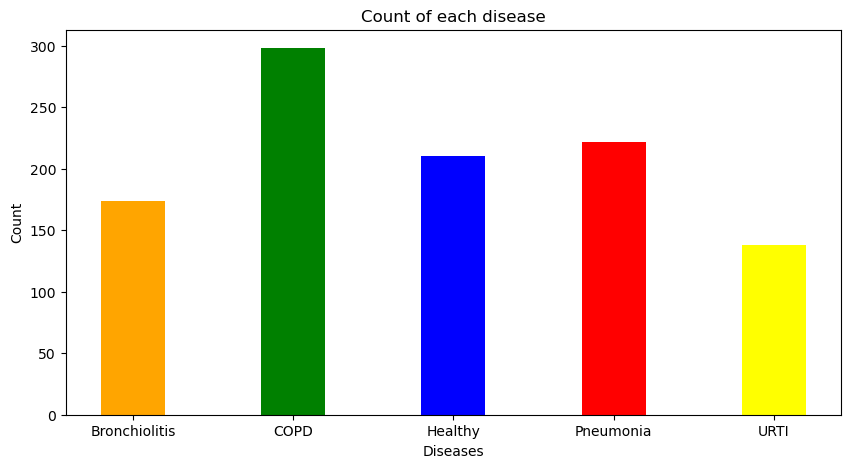

{'Bronchiolitis': 174, 'COPD': 298, 'Healthy': 210, 'Pneumonia': 222, 'URTI': 138}


In [18]:
augmented_lables_count(y)

In [19]:
y_data_encode = y.reshape(y.shape[0],1)
y_data_encode = np.where(y_data_encode == 'COPD',np.array([1,0,0,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Bronchiolitis',np.array([0,1,0,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Pneumonia',np.array([0,0,1,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'URTI',np.array([0,0,0,1,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Healthy',np.array([0,0,0,0,1]).reshape(1,5) , y_data_encode)

Y_data = y_data_encode.astype('float64')


In [20]:
mfccs_features = np.array(x_mfccs)
lables = np.array(Y_data)

mfccs_features.shape , lables.shape

((1042, 52), (1042, 5))

In [21]:
mfccs_features

array([[-528.4309082 ,  104.52567291,   69.89893341, ...,    1.3779093 ,
           1.00682986,    0.87130207],
       [-429.42716083,   56.25198412,   48.94027883, ...,    1.04318042,
           1.33906747,    1.22526353],
       [-529.82897949,  105.58005524,   70.15711212, ...,    1.36810017,
           0.99015296,    0.86666781],
       ...,
       [-540.15545654,   78.8822403 ,   58.73851013, ...,    1.67542732,
           1.5360738 ,    1.44291854],
       [-536.74743652,   76.06425476,   57.63049698, ...,    1.69908977,
           1.60868633,    1.54039741],
       [-527.45074463,   82.99169922,   61.9855423 , ...,    1.58586824,
           1.62284446,    1.63761973]])

In [22]:
from sklearn.model_selection import train_test_split


# First split: Train and Validation sets
mfcc_train, mfcc_val, lables_train, lables_val = train_test_split(
    mfccs_features, lables, test_size=0.175, random_state=9, stratify=lables
)

# Second split: Train and Test sets
mfcc_train, mfcc_test, lables_train, lables_test = train_test_split(
    mfcc_train, lables_train, test_size=0.075, random_state=9, stratify=lables_train
)

# Print shapes of the resulting datasets
print(f"mfcc_train shape: {mfcc_train.shape}, mfcc_val shape: {mfcc_val.shape}, mfcc_test shape: {mfcc_test.shape}")
print(f"lables_train shape: {lables_train.shape}, lables_val shape: {lables_val.shape}, lables_test shape: {lables_test.shape}")


mfcc_train shape: (794, 52), mfcc_val shape: (183, 52), mfcc_test shape: (65, 52)
lables_train shape: (794, 5), lables_val shape: (183, 5), lables_test shape: (65, 5)


In [23]:
mfccs_features.shape[1]

52

In [24]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import LSTM, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Attention, Concatenate, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Add an Input layer with shape
model.add(Input(shape=(mfccs_features.shape[1], 1))) 

# Add Conv1D layers
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # 5 classes for classification

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 48, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 20, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 6, 256)              │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 3, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 304,645 (1.16 MB)

 Trainable params: 304,645 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2322 - loss: 2.0954 - val_accuracy: 0.5355 - val_loss: 1.2237
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4181 - loss: 1.3054 - val_accuracy: 0.5464 - val_loss: 1.1987
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5500 - loss: 1.1714 - val_accuracy: 0.7268 - val_loss: 0.7761
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6764 - loss: 0.8474 - val_accuracy: 0.7486 - val_loss: 0.7082
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7129 - loss: 0.7575 - val_accuracy: 0.7705 - val_loss: 0.6552
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7424 - loss: 0.6745 - val_accuracy: 0.7322 - val_loss: 0.6104
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7661 - loss: 0.6321 - val_accuracy: 0.7814 - val_loss: 0.5509
Epoch 8/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7641 - loss: 0.6532 - val_accuracy: 0

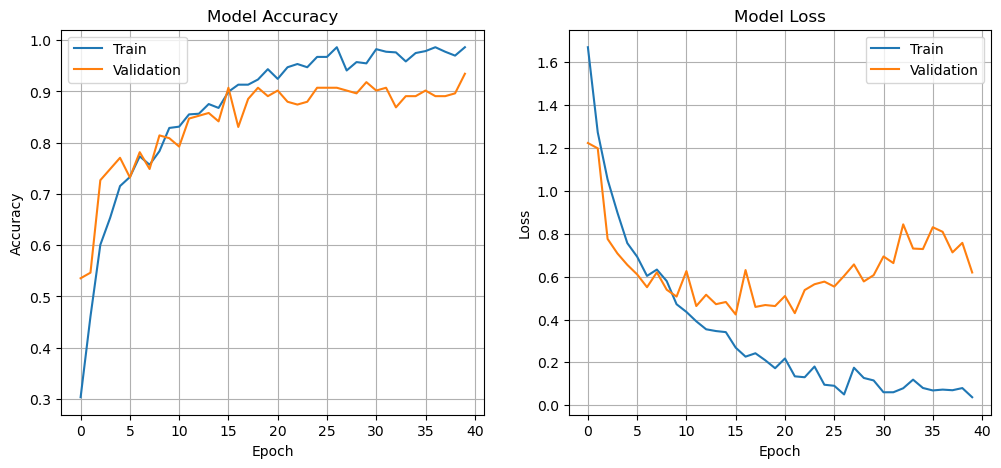

In [26]:
# Assuming you have the history object from model.fit()
history = model.fit(
    mfcc_train, lables_train,
    epochs=40,  # Adjust as needed
    batch_size=8,  # Adjust as needed
    validation_data=(mfcc_val, lables_val),
    verbose=1
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid()

plt.show()



In [27]:
test_loss, test_accuracy = model.evaluate(mfcc_test, lables_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8954 - loss: 0.5686 
Test loss: 0.4960
Test accuracy: 0.8923


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Classification Report:
                precision    recall  f1-score   support

         COPD       0.86      1.00      0.92        18
Bronchiolitis       1.00      0.64      0.78        11
    Pneumonia       1.00      0.93      0.96        14
         URTI       0.88      0.78      0.82         9
      Healthy       0.81      1.00      0.90        13

     accuracy                           0.89        65
    macro avg       0.91      0.87      0.88        65
 weighted avg       0.91      0.89      0.89        65



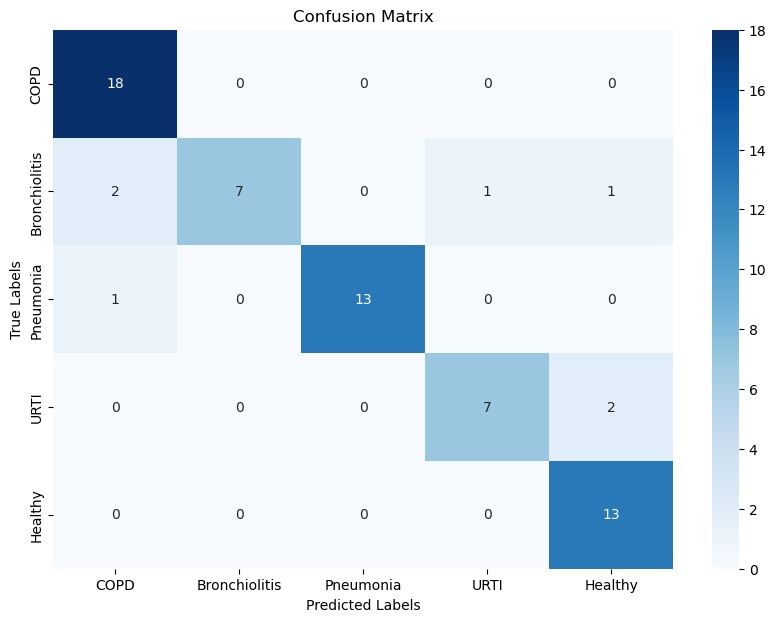

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
y_pred = model.predict(mfcc_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Convert y_test to class labels
y_test_classes = np.argmax(lables_test, axis=1)

# Compute classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=['COPD', 'Bronchiolitis', 'Pneumonia', 'URTI', 'Healthy'])
print("Classification Report:\n", report)

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes, labels=[0, 1, 2, 3, 4])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['COPD', 'Bronchiolitis', 'Pneumonia', 'URTI', 'Healthy'], yticklabels=['COPD', 'Bronchiolitis', 'Pneumonia', 'URTI', 'Healthy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
x_train_lstm = np.expand_dims(mfcc_train,axis=2)
x_val_lstm = np.expand_dims(mfcc_val,axis=2)
x_test_lstm = np.expand_dims(mfcc_test,axis=2)

In [30]:
from tensorflow.keras.layers import LSTM, BatchNormalization
lstm_model = Sequential()

lstm_model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(52, 1)))
lstm_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
lstm_model.add(BatchNormalization())

lstm_model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(52, 1)))
lstm_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
lstm_model.add(BatchNormalization())

lstm_model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
lstm_model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
lstm_model.add(BatchNormalization())

lstm_model.add(LSTM(256, return_sequences=True))
lstm_model.add(LSTM(128))

lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))

lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dropout(0.5))

lstm_model.add(Dense(5, activation='softmax'))

lstm_model.summary()

C:\Users\Sadashiv\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 52, 2048)            │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 26, 2048)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 2048)            │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 26, 1024)            │      10,486,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 13, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 1024)            │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 13, 512)             │       2,621,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 7, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 512)              │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 7, 256)              │         787,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,130,437 (53.90 MB)

 Trainable params: 14,123,269 (53.88 MB)

 Non-trainable params: 7,168 (28.00 KB)

In [31]:
optimiser = tf.keras.optimizers.Adam(learning_rate = 0.0001)
lstm_model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cb = [EarlyStopping(patience=15,monitor='val_accuracy',mode='max',restore_best_weights=True)]

In [32]:
history = lstm_model.fit(x_train_lstm, lables_train, batch_size=8, epochs=150, validation_data=(x_val_lstm, lables_val),callbacks = cb )

Epoch 1/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 266ms/step - accuracy: 0.2253 - loss: 1.6075 - val_accuracy: 0.3169 - val_loss: 1.5631
Epoch 2/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.3274 - loss: 1.5076 - val_accuracy: 0.4863 - val_loss: 1.4047
Epoch 3/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - accuracy: 0.3370 - loss: 1.4543 - val_accuracy: 0.5683 - val_loss: 1.2892
Epoch 4/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - accuracy: 0.4134 - loss: 1.3627 - val_accuracy: 0.6721 - val_loss: 1.1984
Epoch 5/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - accuracy: 0.4802 - loss: 1.2910 - val_accuracy: 0.4044 - val_loss: 1.3457
Epoch 6/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - accuracy: 0.5318 - loss: 1.1600 - val_accuracy: 0.4645 - val_loss: 1.2223
Epoch 7/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - accuracy: 0.5612 - loss: 1.1245 - val_accuracy: 0.4809 - val_loss: 1.3036
Epoch 8/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - accuracy: 0.5674 -

In [33]:
test_loss, test_accuracy = lstm_model.evaluate(x_test_lstm, lables_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9496 - loss: 0.1808 
Test loss: 0.1730
Test accuracy: 0.9538


In [34]:
lstm_model.evaluate(x_val_lstm, lables_val)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9335 - loss: 0.2571


[0.2797851860523224, 0.9289617538452148]

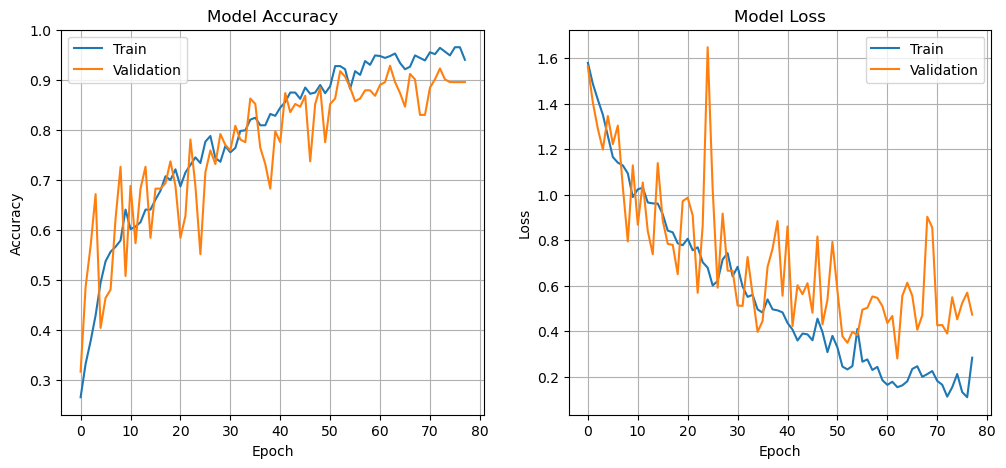

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid()

plt.show()



3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step


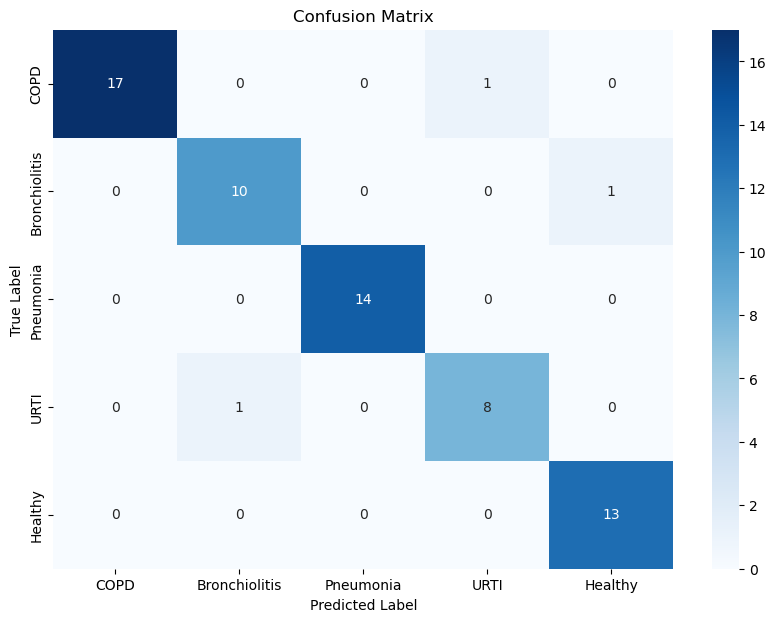

               precision    recall  f1-score   support

         COPD       1.00      0.94      0.97        18
Bronchiolitis       0.91      0.91      0.91        11
    Pneumonia       1.00      1.00      1.00        14
         URTI       0.89      0.89      0.89         9
      Healthy       0.93      1.00      0.96        13

     accuracy                           0.95        65
    macro avg       0.95      0.95      0.95        65
 weighted avg       0.95      0.95      0.95        65



In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict the labels for your test data
y_pred = lstm_model.predict(x_test_lstm)

# Step 2: Convert predictions and true labels from one-hot encoding to class labels
y_pred_class = np.argmax(y_pred, axis=1)
y_true_class = np.argmax(lables_test, axis=1)

# Define the label names
label_names = ['COPD', 'Bronchiolitis', 'Pneumonia', 'URTI', 'Healthy']

# Step 3: Create the confusion matrix
cm = confusion_matrix(y_true_class, y_pred_class)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Calculate precision, recall, and F1-score
report = classification_report(y_true_class, y_pred_class, target_names=label_names)
print(report)


In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, BatchNormalization, Dropout, Input, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K

# Attention Mechanism
class CustomAttention(Layer):
    def __init__(self, **kwargs):
        super(CustomAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_att = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)
        self.b_att = self.add_weight(name="att_bias", shape=(input_shape[-1],), initializer="zeros", trainable=True)
        self.u_att = self.add_weight(name="att_u", shape=(input_shape[-1],), initializer="glorot_uniform", trainable=True)
        super(CustomAttention, self).build(input_shape)

    def call(self, inputs):
        # Apply a fully connected layer with tanh activation
        u_scores = K.tanh(K.dot(inputs, self.W_att) + self.b_att)
        
        # Calculate the attention scores
        att_scores = K.dot(u_scores, K.expand_dims(self.u_att, -1))
        att_scores = K.squeeze(att_scores, -1)  # Remove the last dimension
        att_scores = K.exp(att_scores)
        
        # Normalize the scores
        att_weights = att_scores / K.sum(att_scores, axis=1, keepdims=True) + K.epsilon()
        
        # Apply the attention scores to the context vector
        weighted_input = inputs * K.expand_dims(att_weights, -1)
        context_vector = K.sum(weighted_input, axis=1)
        
        return context_vector

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

# Define the model
custom_lstm_model = Sequential()

custom_lstm_model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(52, 1)))
custom_lstm_model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
custom_lstm_model.add(BatchNormalization())

custom_lstm_model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu'))
custom_lstm_model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
custom_lstm_model.add(BatchNormalization())

custom_lstm_model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
custom_lstm_model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
custom_lstm_model.add(BatchNormalization())

custom_lstm_model.add(LSTM(256, return_sequences=True))
custom_lstm_model.add(LSTM(128, return_sequences=True))

# Add Custom Attention layer
custom_lstm_model.add(CustomAttention())

custom_lstm_model.add(Dense(64, activation='relu'))
custom_lstm_model.add(Dropout(0.5))

custom_lstm_model.add(Dense(32, activation='relu'))
custom_lstm_model.add(Dropout(0.5))

custom_lstm_model.add(Dense(5, activation='softmax'))

custom_lstm_model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
custom_lstm_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
callbacks_list = [EarlyStopping(patience=15, monitor='val_accuracy', mode='max', restore_best_weights=True)]

# Train the model
training_history = custom_lstm_model.fit(x_train_lstm, lables_train, batch_size=8, epochs=150, validation_data=(x_val_lstm, lables_val), callbacks=callbacks_list)


C:\Users\Sadashiv\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 52, 2048)            │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 26, 2048)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 2048)            │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 26, 1024)            │      10,486,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 13, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 13, 1024)            │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 13, 512)             │       2,621,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 7, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 512)              │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 7, 256)              │         787,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 7, 128)              │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_attention (CustomAttention)   │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,147,077 (53.97 MB)

 Trainable params: 14,139,909 (53.94 MB)

 Non-trainable params: 7,168 (28.00 KB)

Epoch 1/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 267ms/step - accuracy: 0.2620 - loss: 1.5801 - val_accuracy: 0.2623 - val_loss: 1.5788
Epoch 2/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - accuracy: 0.3637 - loss: 1.4662 - val_accuracy: 0.5956 - val_loss: 1.2933
Epoch 3/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - accuracy: 0.4046 - loss: 1.3256 - val_accuracy: 0.5246 - val_loss: 1.2036
Epoch 4/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - accuracy: 0.5003 - loss: 1.2458 - val_accuracy: 0.4973 - val_loss: 1.1832
Epoch 5/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - accuracy: 0.5017 - loss: 1.2388 - val_accuracy: 0.4153 - val_loss: 1.3126
Epoch 6/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - accuracy: 0.5239 - loss: 1.1640 - val_accuracy: 0.5246 - val_loss: 1.2206
Epoch 7/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - accuracy: 0.5446 - loss: 1.1910 - val_accuracy: 0.5738 - val_loss: 1.1039
Epoch 8/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 263ms/step - accuracy: 0.5609 -

In [39]:
test_loss, test_accuracy = custom_lstm_model.evaluate(x_test_lstm, lables_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8992 - loss: 0.3198 
Test loss: 0.3042
Test accuracy: 0.9077


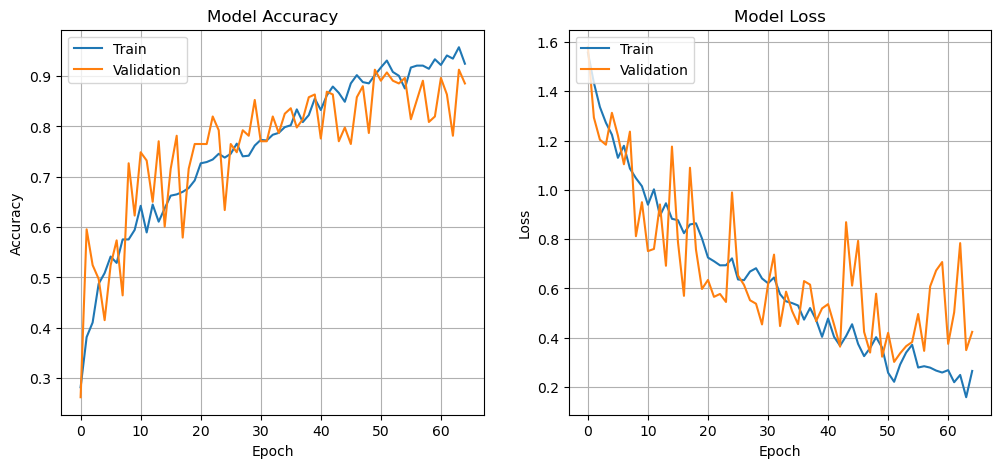

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.show()


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001AB41571750> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step


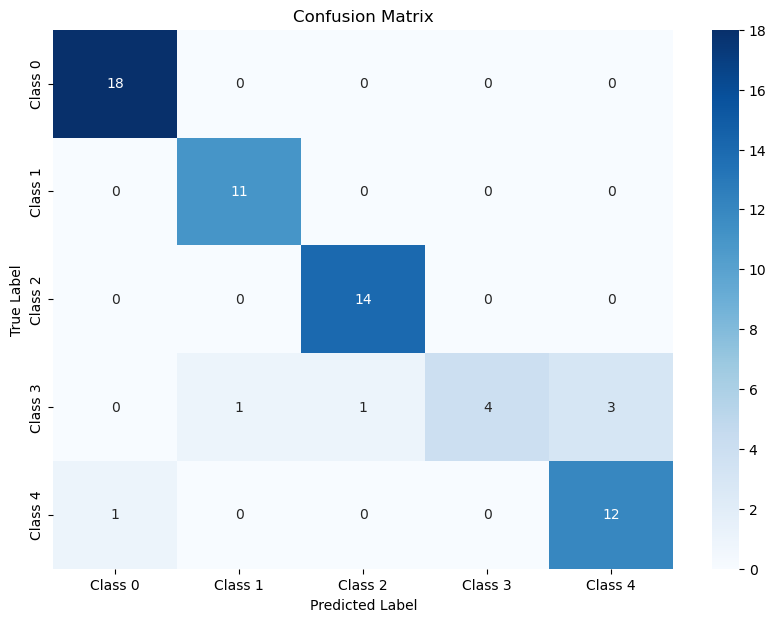

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.95      1.00      0.97        18
     Class 1       0.92      1.00      0.96        11
     Class 2       0.93      1.00      0.97        14
     Class 3       1.00      0.44      0.62         9
     Class 4       0.80      0.92      0.86        13

    accuracy                           0.91        65
   macro avg       0.92      0.87      0.87        65
weighted avg       0.92      0.91      0.90        65



In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Step 1: Predict the labels for your test data
predictions = custom_lstm_model.predict(x_test_lstm)

# Step 2: Convert predictions and true labels from one-hot encoding to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(lables_test, axis=1)

# Step 3: Create the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Calculate precision, recall, and F1-score
classification_report_result = classification_report(true_classes, predicted_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
print("Classification Report:\n", classification_report_result)


In [42]:
import numpy as np

# Assuming you have your test data in 'x_test_lstm'
# Get the probabilities for each class
probabilities = lstm_model.predict(x_test_lstm)

# Assuming the class names are stored in this list (replace with your actual class names)
class_names = ['COPD', 'Bronchiolitis', 'Pneumonia', 'URTI', 'Healthy']

# Loop through each sample and identify the top two predictions
for i, prob in enumerate(probabilities):
    # Get the indices of the largest and second-largest probabilities
    top_two_indices = np.argsort(prob)[-2:][::-1]  # Sort and get the last two indices in descending order

    # Get the corresponding class names
    top_class = class_names[top_two_indices[0]]
    second_class = class_names[top_two_indices[1]]

    # Get the corresponding probabilities
    top_prob = prob[top_two_indices[0]]
    second_prob = prob[top_two_indices[1]]

    # Determine if the largest probability is exactly 1
    if top_prob == 1.0:
        # If the largest probability is 1, omit the second-largest class
        print(f"The prediction for the patient is '{top_class}' with a probability of {top_prob:.5f}.")
    else:
        # If the largest probability is less than 1 and the second-largest is 'Healthy'
        if second_class == 'Healthy':
            print(f"The prediction for the patient is '{top_class}' with a probability of {top_prob:.5f} but can also be termed as '{second_class}' with a probability of {second_prob:.5f}.")
        else:
            print(f"The prediction for the patient is '{top_class}' with a probability of {top_prob:.5f} but is at risk of '{second_class}' with a probability of {second_prob:.5f}.")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The prediction for the patient is 'Healthy' with a probability of 0.99881 but is at risk of 'URTI' with a probability of 0.00111.
The prediction for the patient is 'URTI' with a probability of 0.84434 but can also be termed as 'Healthy' with a probability of 0.11490.
The prediction for the patient is 'COPD' with a probability of 1.00000 but is at risk of 'Pneumonia' with a probability of 0.00000.
The prediction for the patient is 'URTI' with a probability of 0.99427 but can also be termed as 'Healthy' with a probability of 0.00356.
The prediction for the patient is 'COPD' with a probability of 1.00000 but is at risk of 'Pneumonia' with a probability of 0.00000.
The prediction for the patient is 'Bronchiolitis' with a probability of 0.99999 but is at risk of 'COPD' with a probability of 0.00001.
The prediction for the patient is 'Pneumonia' with a probability of 0.99996 but is at risk of 'COPD' with a probability of 0.00003.
The prediction for the p